#### yz8HM3pPRaXzjAOiTfY8



@inproceedings{rogers-etal-2018-rusentiment,
    title = "{R}u{S}entiment: An Enriched Sentiment Analysis Dataset for Social Media in {R}ussian",
    author = "Rogers, Anna  and
      Romanov, Alexey  and
      Rumshisky, Anna  and
      Volkova, Svitlana  and
      Gronas, Mikhail  and
      Gribov, Alex",
    booktitle = "Proceedings of the 27th International Conference on Computational Linguistics",
    month = aug,
    year = "2018",
    address = "Santa Fe, New Mexico, USA",
    publisher = "Association for Computational Linguistics",
    url = "https://www.aclweb.org/anthology/C18-1064",
    pages = "755--763",
}


In [227]:
import vk
import vk_api
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [228]:
token = "d342433ed342433ed342433eebd33e7413dd342d342433eb11ed2714f86c43d1492ff42"
session = vk.Session(access_token=token)
vk_api = vk.API(session)
v = 5.131
group_id = "vysotacommunity"

In [229]:
def get_members(groupid):
    members_raw = vk_api.groups.getMembers(group_id=groupid, v=v)
    data = members_raw["items"]
    count = members_raw["count"]
    for i in range(1, count+1):  
        data = data + vk_api.groups.getMembers(group_id=groupid, v=5.92, offset=i*1000)["items"]
    return data

In [230]:
def save_data(data, filename="vk.txt"):
    with open(filename, "w") as file:
        for item in data:   
            file.write("vk.com/id" + str(item) + "\n") 


def enter_data(filename="vk.txt"):
    with open(filename) as file:
        b = []
        for line in file:   
            b.append(line[9:len(line) - 1])  
    return b

In [253]:
def get_members_data(members):
    sex_list = []
    city_list = []
    for i in range(len(members)):
        t = vk_api.users.get(v=v, user_id=members[0][i], fields=['sex'])[0].get('sex')
        p = vk_api.users.get(v=v, user_id=members[0][i], fields=['city'])[0].get('city')
        sex_list.append(t)
        city_list.append(p)
    city_list = [({'id':1, 'title':'Not stated'} if x is None else x) for x in city_list]
    sex_df = pd.DataFrame(sex_list).rename({0: 'sex'}, axis=1)
    city_df = pd.DataFrame(city_list)
    return pd.concat([members, sex_df, city_df], axis=1)

In [254]:
merged = get_members_data(members)
merged

,0,sex,id,title
0,22984,2,1,Moscow
1,34667,1,1,Moscow
2,150333,1,1,Moscow
3,162142,1,1,Moscow
4,201123,1,1,Moscow
...,...,...,...,...
565,710213683,1,1,Moscow
566,710356993,1,1,Not stated
567,710476449,2,1,Not stated
568,710704073,1,1,Not stated


In [5]:
save_data(get_members(group_id))

In [6]:
members = pd.DataFrame(enter_data())

In [48]:
memebers_data = get_members_data(members)

NameError: name 'members_data' is not defined

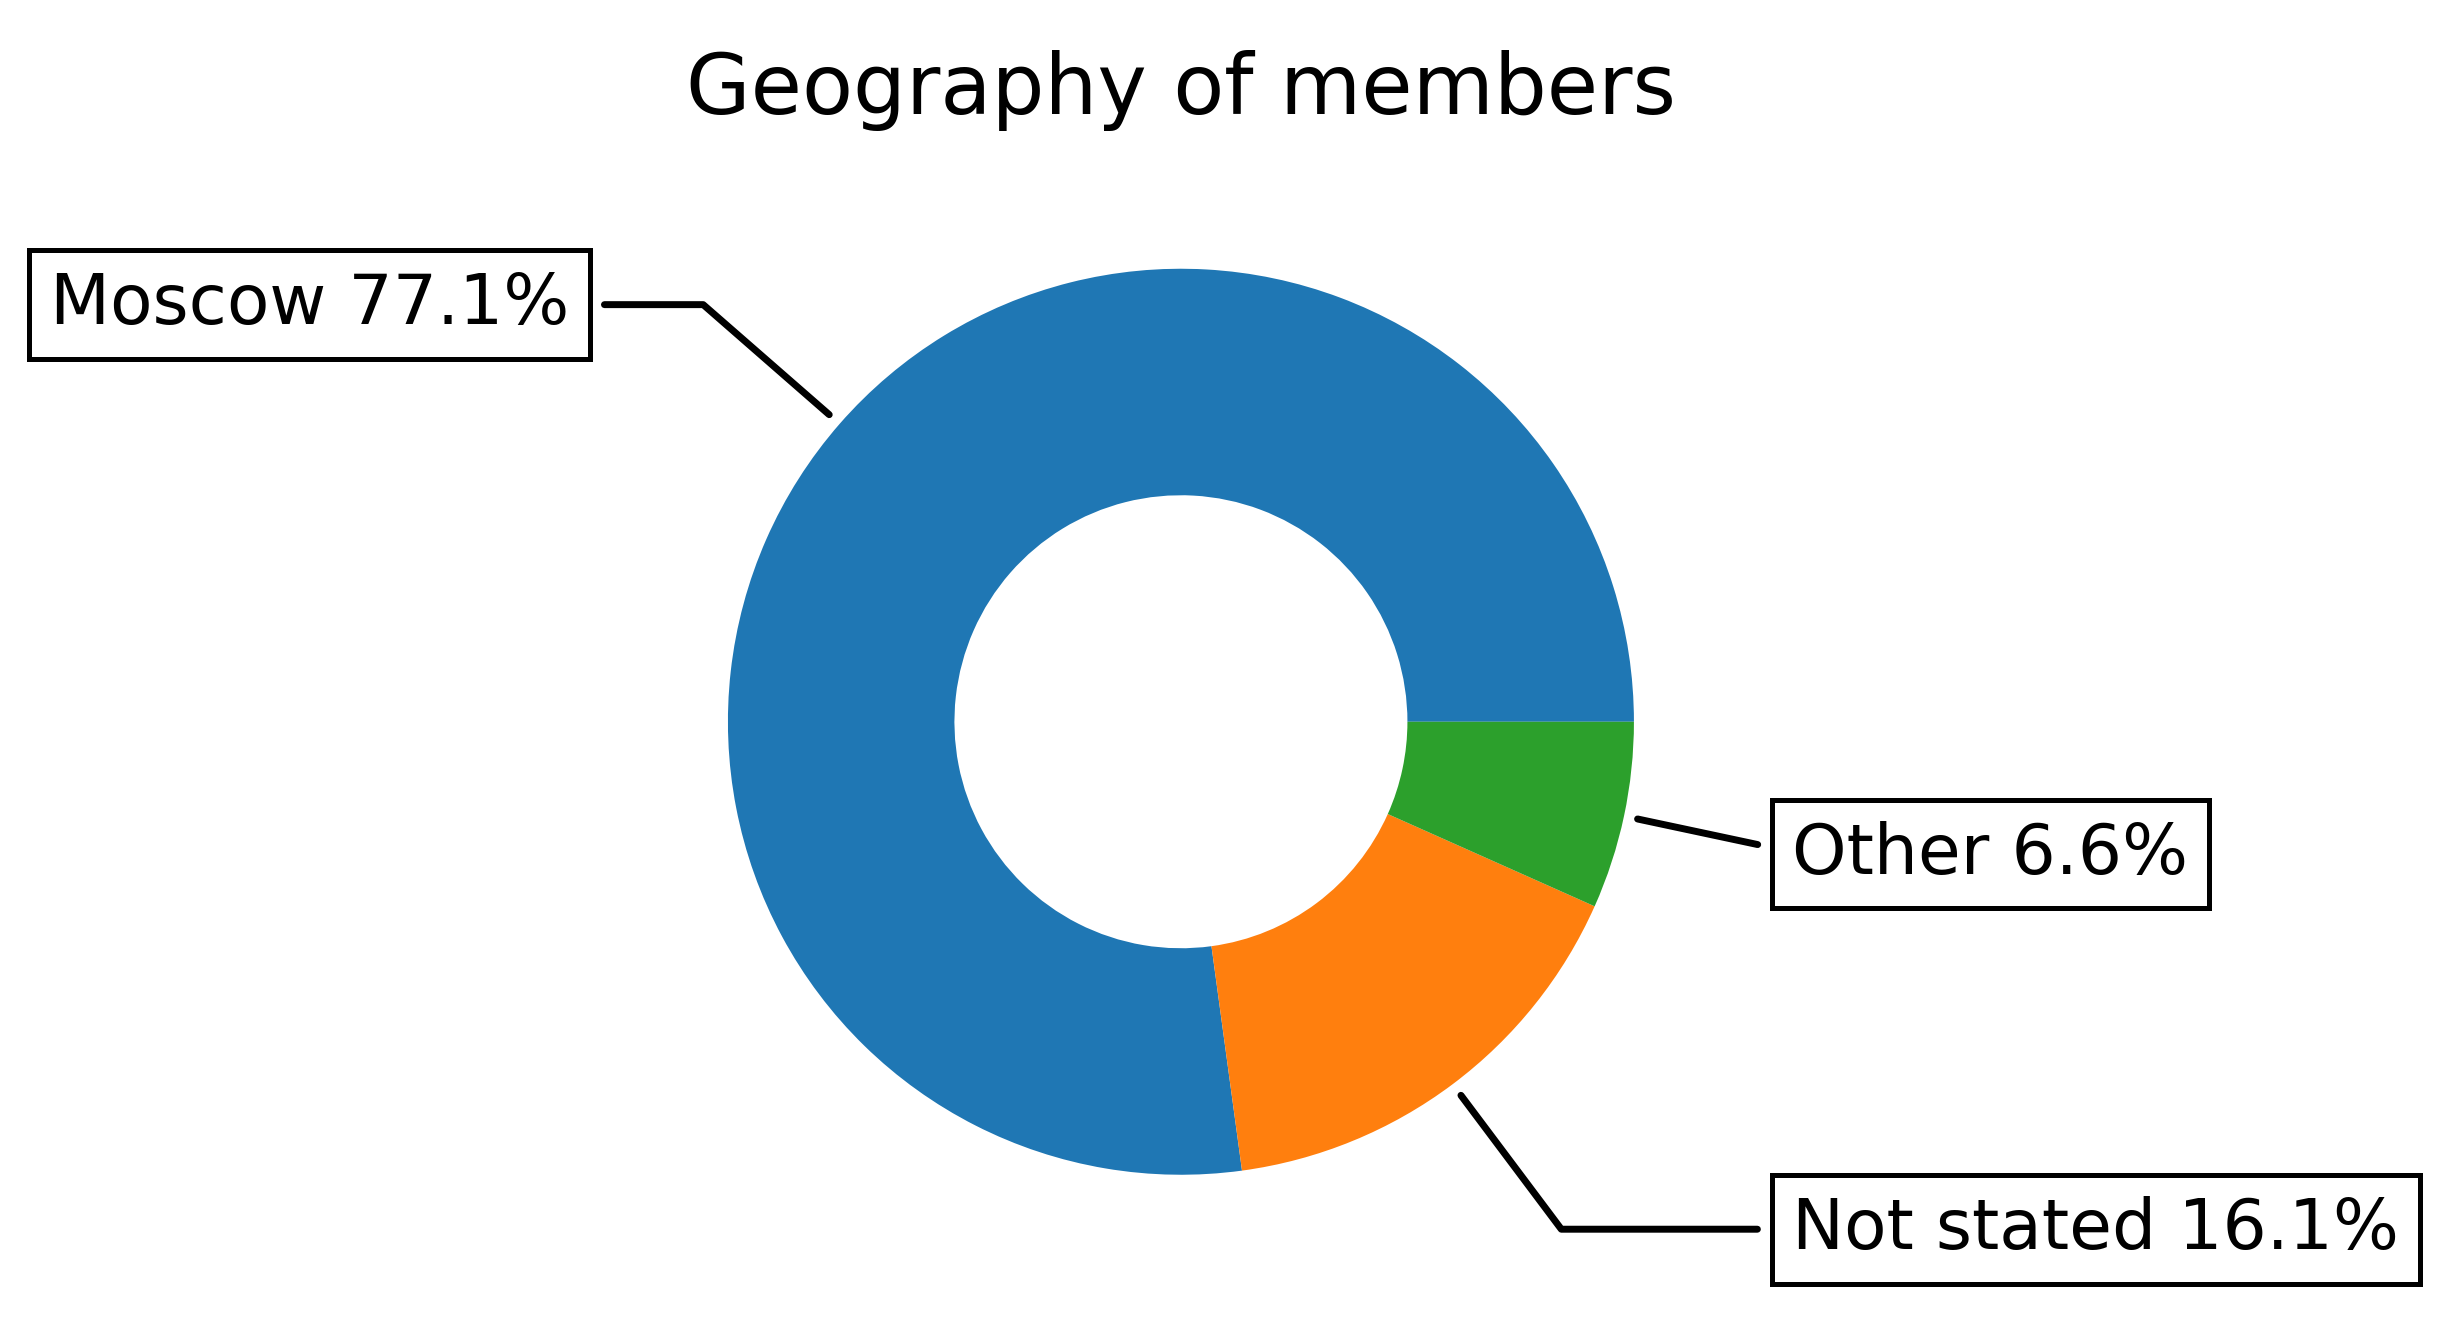

In [269]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"), dpi=500)
recipe = ['Moscow', 'Not stated', 'Other']
data = [439, 92, 38]
data_share = data / np.array(data).sum() * 100 // 0.1 / 10
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=0)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(str(recipe[i]) + ' ' + str(data_share[i]) + '%', xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Geography of members")

plt.savefig('geography.png')

[453 117]


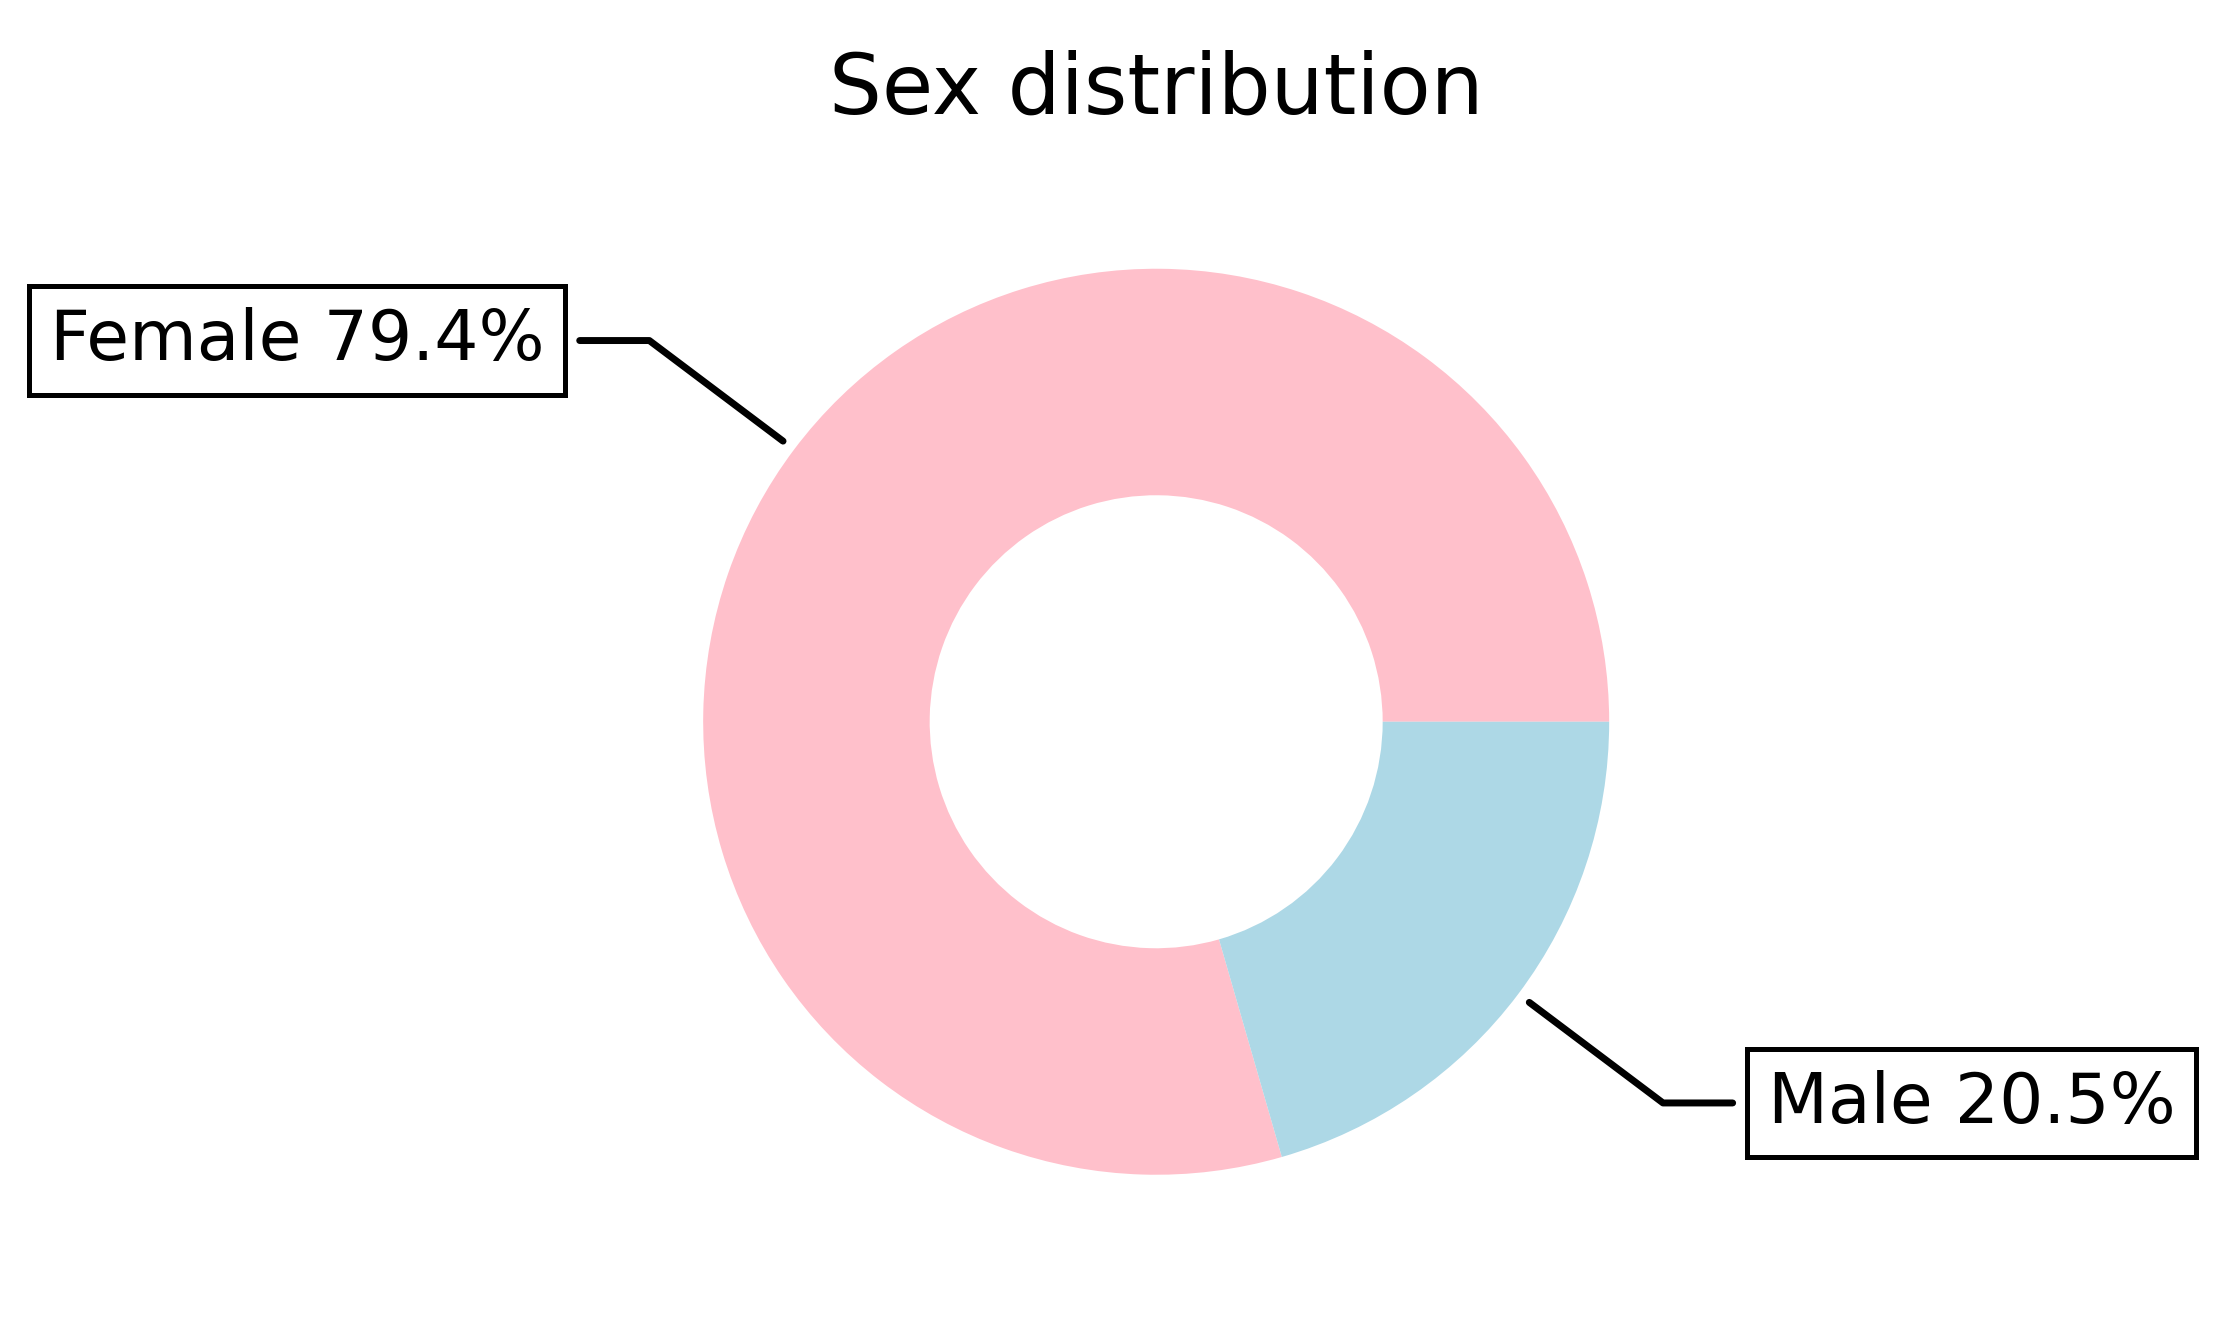

In [264]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"), dpi=500)
recipe = ['Female', 'Male', 'Other|Not stated']
data = np.array(merged.groupby(by='sex').count()[0])
print(data)
data_share = data / np.array(data).sum() * 100 // 0.1 / 10
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=0, colors=['pink', 'lightblue'])
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")
colors = ['pink', 'lightblue']
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(str(recipe[i]) + ' ' + str(data_share[i]) + '%', xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Sex distribution")

plt.savefig('sex.png')

In [343]:
#with open('texts.txt', 'w', encoding="utf-8") as file:
all_posts = []
all_dates = []
offset = 0
for offset in [0, 100]:
    for k in range(100):
        #file.write(vk_api.wall.get(v=v, domain=group_id, count=1000, extended=1, offset=offset).get('items')[k].get('text'))
        all_posts.append(vk_api.wall.get(v=v, domain=group_id, count=1000, extended=1, offset=offset).get('items')[k].get('text'))
        all_dates.append(vk_api.wall.get(v=v, domain=group_id, count=1000, extended=1, offset=offset).get('items')[k].get('date'))

In [330]:
vk_api.wall.get(v=v, domain=group_id, count=1000, extended=1, offset=offset).get('items')[99].get('date')

1606813223

In [1]:
tokenizer = RegexTokenizer()
tokens = tokenizer.split('всё очень плохо')  # [('всё', None), ('очень', None), ('плохо', None)]

model = FastTextSocialNetworkModel(tokenizer=tokenizer)

messages = all_posts[::]

results = model.predict(messages, k=2)

NameError: name 'RegexTokenizer' is not defined

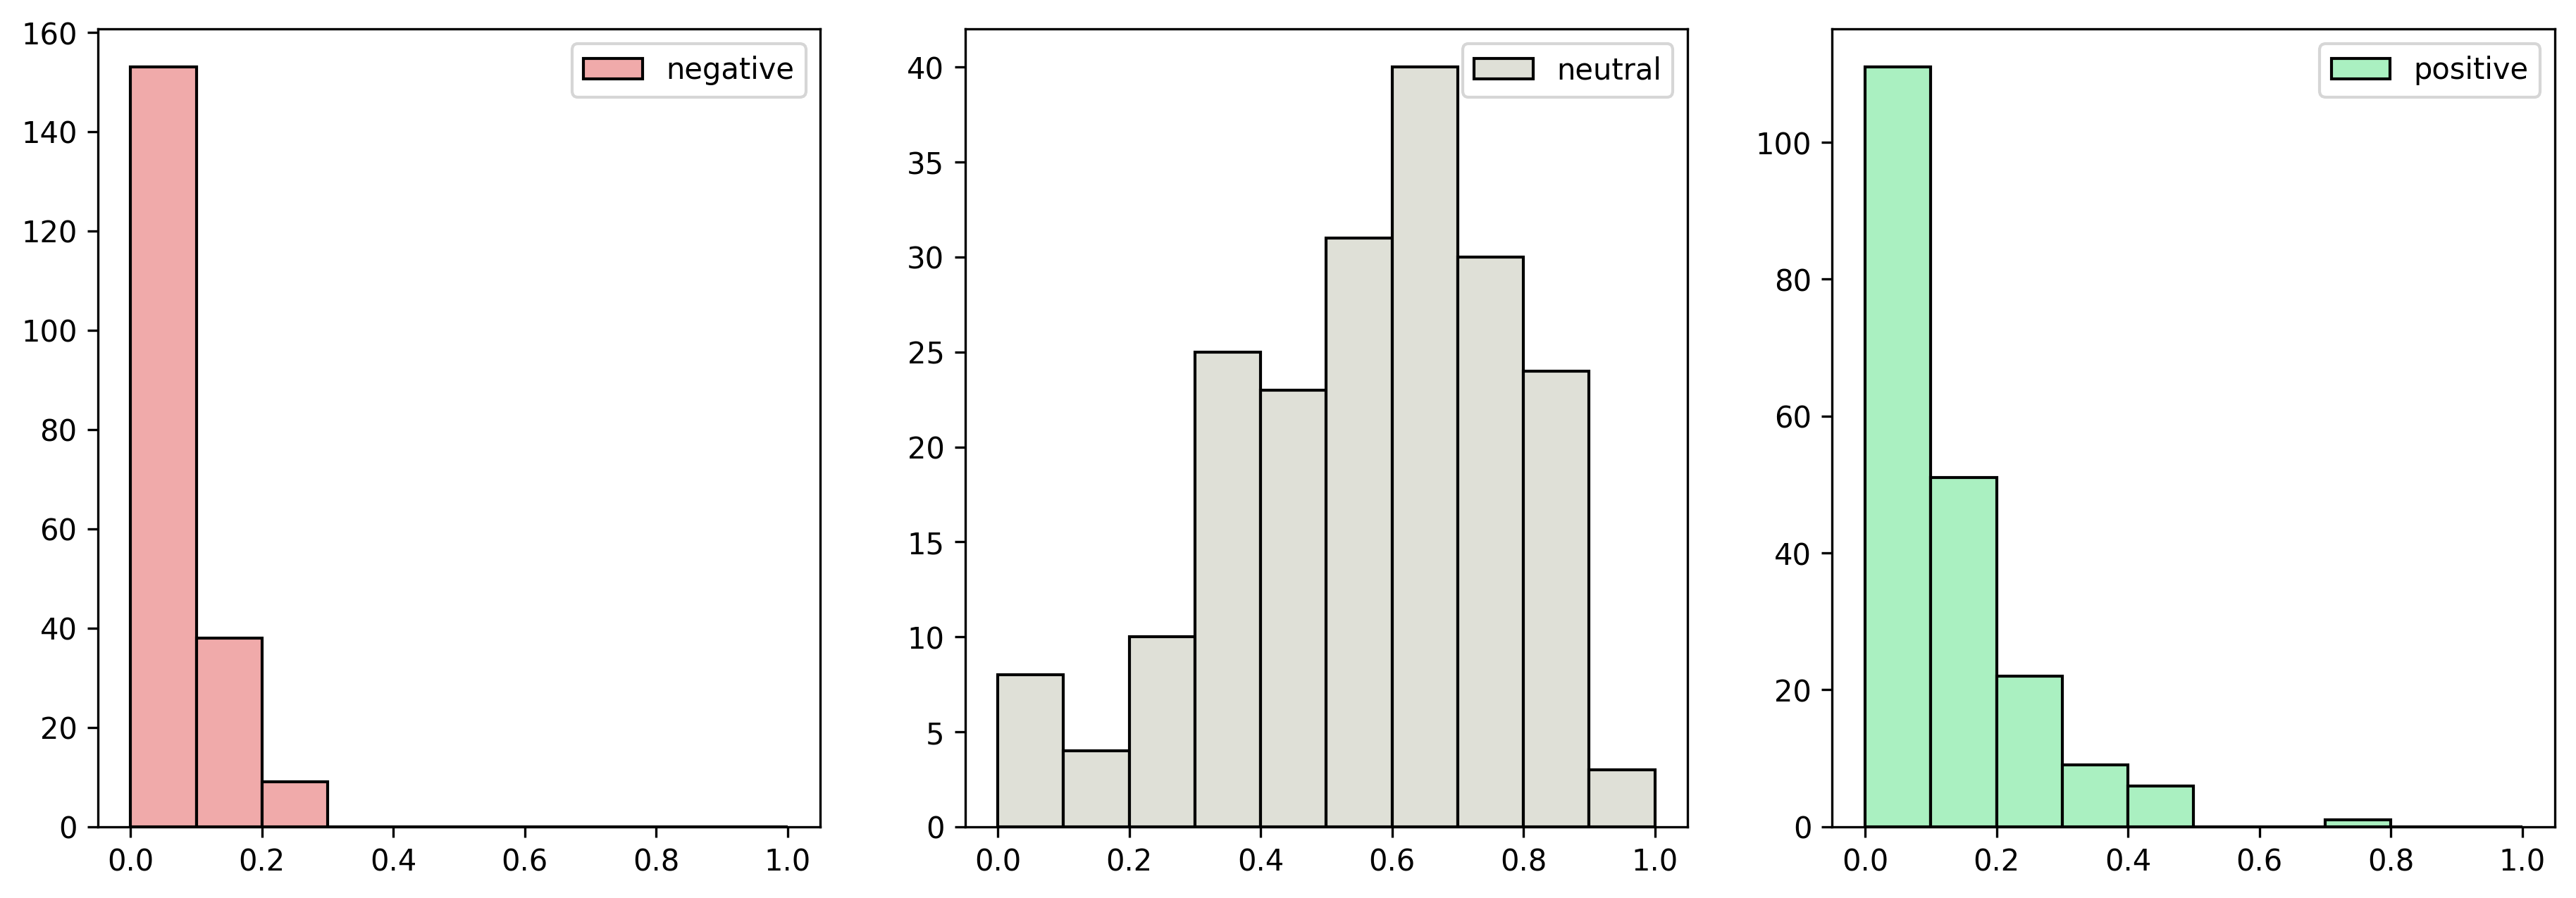

In [348]:
def make_array(posts):
    return np.array([(0 if x is None else x) for x in posts])


colors = ['#f0aaaa', '#dfe0d7', '#aaf0c1']
labels = ['negative', 'neutral', 'positive']
posts_neutrality = []
posts_negativity = []
posts_positivity = []
for i in range (200):
    posts_negativity.append(results[i].get('negative'))
    posts_neutrality.append(results[i].get('neutral'))
    posts_positivity.append(results[i].get('positive'))
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5), dpi=300)
for k, posts_type in [(0, posts_negativity), (1, posts_neutrality), (2, posts_positivity)]:
    ax = axes[k]
    ax.hist(make_array(posts_type), bins=10, color=colors[k], edgecolor='black', label=labels[k], range=(0,1))
    ax.set_label(posts_type)
    ax.legend()
plt.savefig("histplots_dost.png")

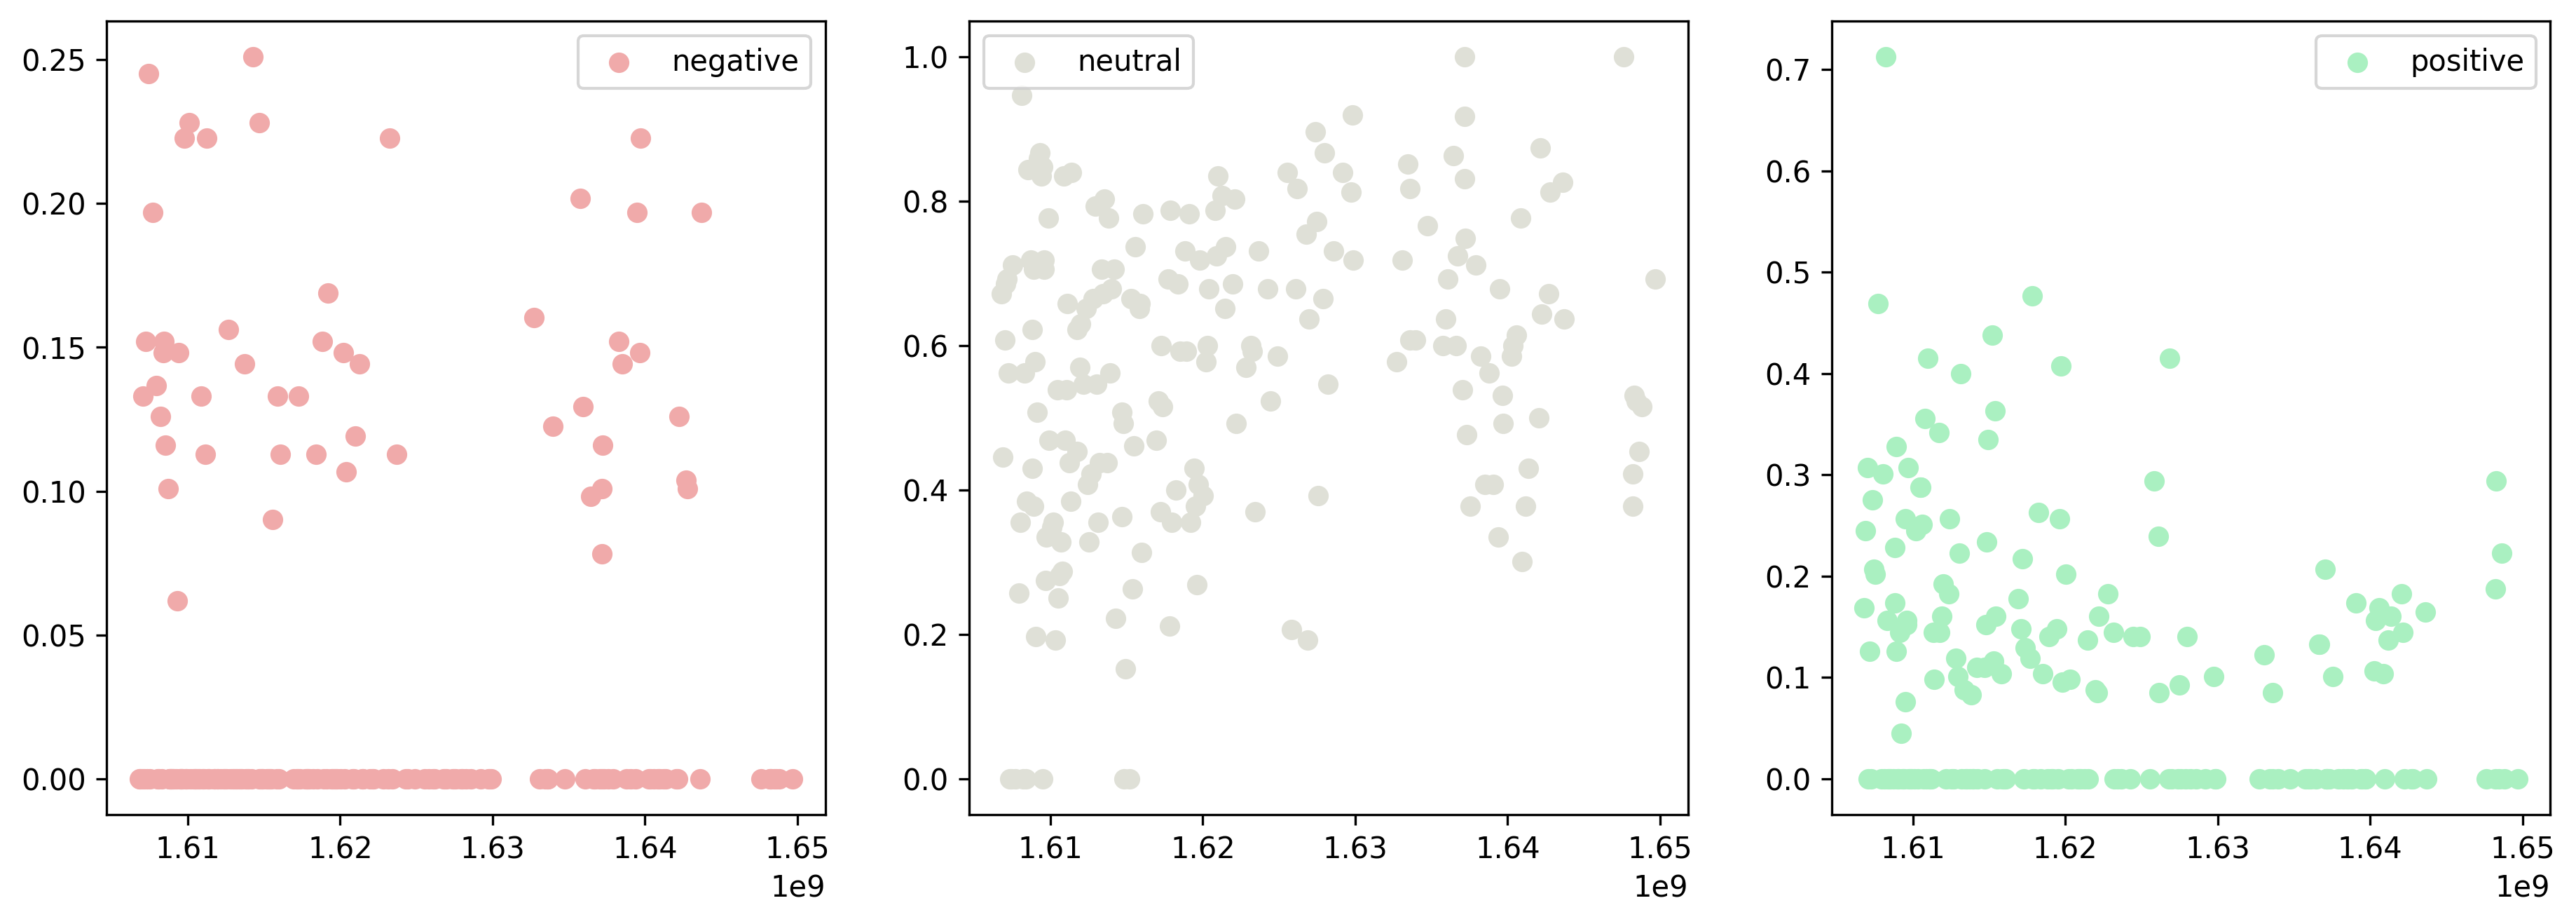

In [358]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5), dpi=300)



for k, posts_type in [(0, posts_negativity), (1, posts_neutrality), (2, posts_positivity)]:
    ax = axes[k]
    ax.scatter(all_dates, make_array(posts_type), color=colors[k], label=labels[k])
    ax.set_label(posts_type)
    ax.legend()
    
plt.savefig("histplots_time.png")

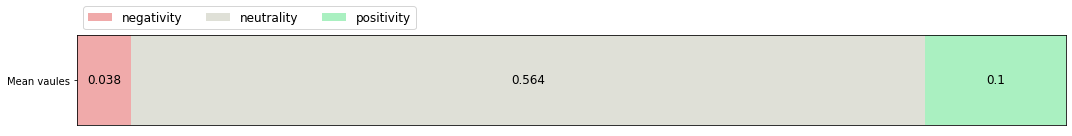

In [353]:
category_names = ['negativity', 'neutrality', 'positivity']
results = {
    'Mean vaules': [round(make_array(posts_negativity).mean(),3), round(make_array(posts_neutrality).mean(),3), round(make_array(posts_positivity).mean(),3)]
}


def survey(results, category_names):

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = ['#f0aaaa', '#dfe0d7', '#aaf0c1']

    fig, ax = plt.subplots(figsize=(15, 2))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
    ax.set_ylim(-.05,.05)

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.1,
                        label=colname, color=color)
        ax.bar_label(rects, label_type='center', color='black', fontsize='large')
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='large')
    return fig, ax


survey(results, category_names)
plt.tight_layout()
plt.savefig('comparison_posts.png')

In [270]:
# анализ тональности комментов

In [361]:
all_posts[-14]

'Итальянская пиццерия PETRUCCIO покоряет Высоту! 🍕\n\nВ Высоте можно будет не только хорошо провести время, но и вкусно поесть. Пиццерия PETRUCCIO порадует свежими натуральными ингредиентами и домашним тестом, благодаря которым создается великолепный вкус вашей пиццы 🤤\n\nУвидимся в Высоте ❤️'